In [1]:
!apt-get update
!apt-get install -y libgl1-mesa-glx

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1188 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3109 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2896 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1117 kB]
Hit:7 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1421 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3597 kB]
Get:12 http://archive.ubuntu.com/ubuntu f

In [2]:
!git clone https://github.com/vislearn/ControlNet-XS

fatal: destination path 'ControlNet-XS' already exists and is not an empty directory.


In [3]:
!pip install -r ControlNet-XS/requirements/pt2.txt -qq
!pip install -e ControlNet-XS -qq

___

Restart kernel here, so newly installed packages are available

___

In [1]:
import scripts.control_utils as cu
import torch
from PIL import Image

/opt/conda/lib/python3.10/site-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


In [2]:
path_to_config = 'ControlNet-XS/configs/inference/sdxl/sdxl_encD_canny_48m.yaml'

If this results in the kernel crashing, I'm using too much GPU memory elsewhere. Shut down every other kernel and try again.

In [3]:
model = cu.create_model(path_to_config)

Building a Downsample layer with 2 dims.
  --> settings are: 
 in-chn: 320, out-chn: 320, kernel-size: 3, stride: 2, padding: 1
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads with a dimension of 64.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 2048 and using 10 heads with a dimension of 64.
BasicTransformerBlock is using checkpointing
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads with a dimension of 64.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 2048 and using 10 heads with a dimension of 64.
BasicTransformerBlock is using checkpointing
constructing SpatialTransformer of depth 2 w/ 640 channels and 10 heads
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 10 heads with a dimension of 64.
Setting up MemoryEffici

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.12.self_attn.q_proj.bias', 'vision_model.encoder.layers.3.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.self_attn.v_proj.bias', 'vision_model.encoder.layers.6.self_attn.out_proj.weight', 'vision_model.encoder.layers.11.layer_norm2.weight', 'vision_model.encoder.layers.16.mlp.fc2.bias', 'vision_model.encoder.layers.9.mlp.fc1.bias', 'vision_model.encoder.layers.11.self_attn.out_proj.bias', 'vision_model.encoder.layers.21.self_attn.out_proj.weight', 'vision_model.encoder.layers.7.self_attn.out_proj.weight', 'vision_model.encoder.layers.8.mlp.fc1.weight', 'vision_model.encoder.layers.16.mlp.fc1.weight', 'vision_model.encoder.layers.21.layer_norm2.bias', 'vision_model.encoder.layers.8.self_attn.q_proj.weight', 'vision_model.encoder.layers.0.self_attn.k_proj.bias', 'vision_model.encoder.layers.9.self_attn.out_proj.weight', 'vision_model

Initialized embedder #0: FrozenCLIPEmbedder with 123060480 params. Trainable: False
Initialized embedder #1: FrozenOpenCLIPEmbedder2 with 694659841 params. Trainable: False
Initialized embedder #2: ConcatTimestepEmbedderND with 0 params. Trainable: False
Initialized embedder #3: ConcatTimestepEmbedderND with 0 params. Trainable: False
Initialized embedder #4: ConcatTimestepEmbedderND with 0 params. Trainable: False
making attention of type 'vanilla-xformers' with 512 in_channels
building MemoryEfficientAttnBlock with 512 in_channels...
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla-xformers' with 512 in_channels
building MemoryEfficientAttnBlock with 512 in_channels...
Loaded model config from [ControlNet-XS/configs/inference/sdxl/sdxl_encD_canny_48m.yaml]


In [4]:
model = model.to('cuda')

In [5]:
2+2

4

My goal is to understand the channel sizes and compare them to my expectation

In [6]:
ctrl_model = model.model.control_model
base_model = model.model.diffusion_model
type(ctrl_model), type(base_model)

(sgm.modules.diffusionmodules.twoStreamControl.ControlledXLUNetModel,
 sgm.modules.diffusionmodules.openaimodel.UNetModel)

In [7]:
from util import simple_describe

In [8]:
simple_describe(ctrl_model.input_blocks, mode='cnxs')

 ModuleList 
	 TimestepEmbedSequential 
		 Conv2d (4, 32)
	 TimestepEmbedSequential 
		 ResBlock (352, 32)
	 TimestepEmbedSequential 
		 ResBlock (352, 32)
	 TimestepEmbedSequential 
		 Downsample (352, 32)
	 TimestepEmbedSequential 
		 ResBlock (352, 64)
		 SpatialTransformer (64, 64)
	 TimestepEmbedSequential 
		 ResBlock (704, 64)
		 SpatialTransformer (64, 64)
	 TimestepEmbedSequential 
		 Downsample (704, 64)
	 TimestepEmbedSequential 
		 ResBlock (704, 128)
		 SpatialTransformer (128, 128)
	 TimestepEmbedSequential 
		 ResBlock (1408, 128)
		 SpatialTransformer (128, 128)


In [9]:
simple_describe(ctrl_model.middle_block, mode='cnxs')

 TimestepEmbedSequential 
	 ResBlock (1408, 128)
	 SpatialTransformer (128, 128)
	 ResBlock (128, 128)


In [10]:
simple_describe(base_model.middle_block, mode='cnxs')

 TimestepEmbedSequential 
	 ResBlock (1280, 1280)
	 SpatialTransformer (1280, 1280)
	 ResBlock (1280, 1280)


In [11]:
simple_describe(base_model.output_blocks, mode='cnxs')

 ModuleList 
	 TimestepEmbedSequential 
		 ResBlock (2560, 1280)
		 SpatialTransformer (1280, 1280)
	 TimestepEmbedSequential 
		 ResBlock (2560, 1280)
		 SpatialTransformer (1280, 1280)
	 TimestepEmbedSequential 
		 ResBlock (1920, 1280)
		 SpatialTransformer (1280, 1280)
		 Upsample (1280, 1280)
	 TimestepEmbedSequential 
		 ResBlock (1920, 640)
		 SpatialTransformer (640, 640)
	 TimestepEmbedSequential 
		 ResBlock (1280, 640)
		 SpatialTransformer (640, 640)
	 TimestepEmbedSequential 
		 ResBlock (960, 640)
		 SpatialTransformer (640, 640)
		 Upsample (640, 640)
	 TimestepEmbedSequential 
		 ResBlock (960, 320)
	 TimestepEmbedSequential 
		 ResBlock (640, 320)
	 TimestepEmbedSequential 
		 ResBlock (640, 320)


___

In [21]:
size = 768
num_samples=1

In [22]:
prompt='cinematic, shoe in the streets, made from meat, photorealistic shoe, highly detailed'

In [23]:
def get_canny_edges():
    image_path = 'input_images/shoe.png'
    image = cu.get_image(image_path, size=size)
    edges = cu.get_canny_edges(image, low_th=250, high_th=100)
    return edges

In [24]:
edges = get_canny_edges()

___

In [ ]:
assert False

Let's use the model without control first, to see it works as expected

In [12]:
from util import public_attrs

In [17]:
public_attrs(model, contains=['no', 'model'])

['configure_sharded_model',
 'denoiser',
 'first_stage_model',
 'model',
 'no_cond_log',
 'on_predict_model_eval',
 'on_test_model_eval',
 'on_test_model_train',
 'on_validation_model_eval',
 'on_validation_model_train',
 'prepare_data_per_node']

In [18]:
public_attrs(model.model, contains=['no', 'model'])

['ch_inout_base',
 'ch_inout_ctr',
 'control_model',
 'control_model_ratio',
 'diffusion_model',
 'hint_model',
 'model_channels',
 'no_control']

In [20]:
model.model.no_control = True

In [25]:
samples, controls = cu.get_sdxl_sample(
    guidance=edges,
    ddim_steps=10,
    num_samples=num_samples,
    model=model,
    shape=[4, size // 8, size // 8],
    control_scale=0.95,
    prompt='cinematic, shoe in the streets, made from meat, photorealistic shoe, highly detailed',
    n_prompt='lowres, bad anatomy, worst quality, low quality',
)

Global seed set to 1999158951


[CONTROL CORRECTION OF ControlledDiffusionEngine SCALED WITH 0.95]


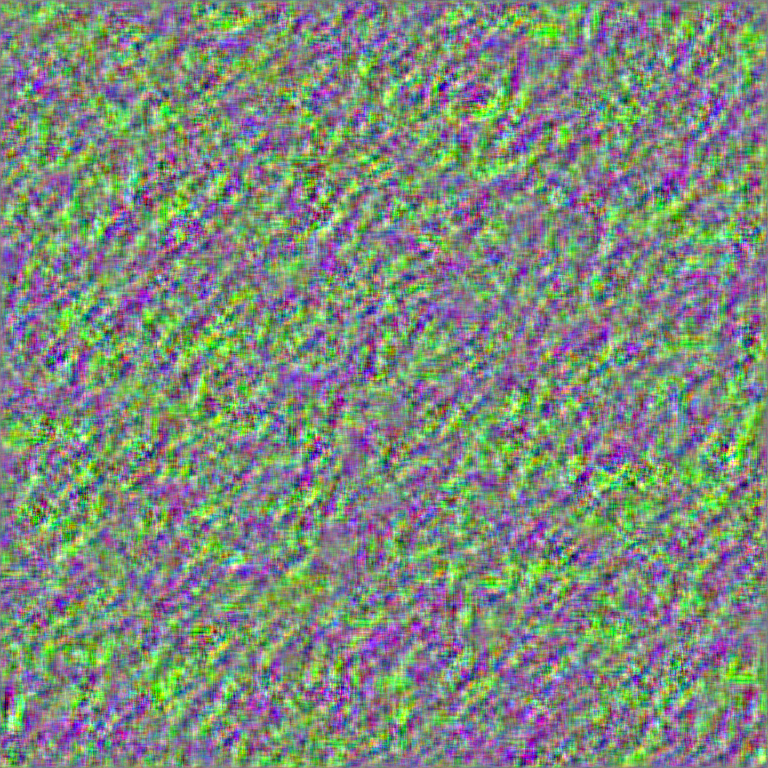

In [26]:
Image.fromarray(cu.create_image_grid(samples))

___

In [ ]:
assert False

In [20]:
samples, controls = cu.get_sdxl_sample(
    guidance=edges,
    ddim_steps=10,
    num_samples=num_samples,
    model=model,
    shape=[4, size // 8, size // 8],
    control_scale=0.95,
    prompt=prompt,
    n_prompt='lowres, bad anatomy, worst quality, low quality',
)

Global seed set to 1999158951


[CONTROL CORRECTION OF ControlledDiffusionEngine SCALED WITH 0.95]


In [21]:
Image.fromarray(cu.create_image_grid(samples)).save('SDXL_Shoe.png')